In [24]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from pandas import read_csv
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import History 
from sklearn.model_selection import RandomizedSearchCV
history = History()

In [19]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train=x_train.reshape(60000, 784)
x_test=x_test.reshape(10000, 784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/ 255.0
x_test=x_test / 255.0


In [8]:
Y_train= to_categorical(y_train, 10)
Y_test= to_categorical(y_test, 10)
def create_model(optimizer="adam", activation="relu", dropout=0.2):
    
    model=keras.Sequential()

    model.add(Dense(512, input_shape=(784,), activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation=activation))
    model.add(Dropout(dropout))


    model.add(Dense(10, activation='softmax'))



    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=["accuracy"]
        

        )
    return model
model = KerasClassifier(build_fn=create_model)
#define the grid search parameter
batch_size = [80, 120, 160, 180, 220]
optimizer = ["SGD", "adam", "RMSprop", "Adadelta"]
dropout = [0.0, 0.1, 0.2, 0.3]
activation = ['relu', 'sigmoid', 'tanh', 'hard_sigmoid']

search_pool = dict(batch_size=batch_size, optimizer=optimizer, dropout=dropout, activation =activation )

grid = RandomizedSearchCV(model,search_pool, return_train_score=True, n_jobs=-1)
grid_result = grid.fit(x_train, Y_train)








375/375 [==============================] - 14s 37ms/step - loss: 0.2996 - accuracy: 0.9083


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      36.387972      0.693495         4.119682        0.372925   
1      37.075226      0.762829         5.424624        0.692208   
2      40.837907      2.241702         6.170437        1.132162   
3      45.521793      3.590676         7.305164        0.839374   
4      47.095465      5.926460         6.247277        1.288918   
5      46.130623      5.928985         7.132157        2.322345   
6      48.530403      4.443826         6.489252        1.875155   
7      59.534481      7.110379         7.577117        4.584902   
8      58.296907      9.075333        10.283535        6.252412   
9      49.277190      0.414743         5.323896        1.554483   

  param_optimizer param_dropout param_batch_size param_activation  \
0            adam           0.2              220             relu   
1             SGD           0.1              180             tanh   
2            adam             0              220       

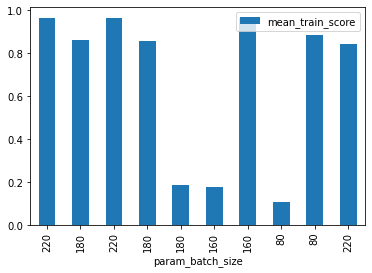

In [53]:
#print(grid_result.cv_results_)
df_cv_results = pd.DataFrame(grid_result.cv_results_)
print (df_cv_results)
selected_col=df_cv_results[["mean_train_score","param_batch_size"]]
new_df = selected_col.copy()
new_df.plot(x ='param_batch_size', y='mean_train_score', kind = 'bar')
plt.show()

